# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

In [1]:
!git clone https://github.com/AarohiSingla/Image-Classification-Using-EfficientNets.git

Cloning into 'Image-Classification-Using-EfficientNets'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19 (from 1)
Receiving objects: 100% (19/19), 668.63 KiB | 17.14 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
!ls

Image-Classification-Using-EfficientNets  sample_data


In [3]:
cd Image-Classification-Using-EfficientNets/

/content/Image-Classification-Using-EfficientNets


In [4]:
!ls

1_efficientnet_with_imagenet_pretrained_weights.ipynb  dataset
2-efficientnetB0_Custom_dataset.ipynb		       unseen_imagenet.jfif
3-EfficientNetB0_for_transfer_learning.ipynb


![image.png](attachment:image.png)

# Data Pre Processing

In [5]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['earphone', 'headphone', 'phones']
Types of classes labels found:  3


In [6]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [7]:

# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

      Labels                           image
0   earphone    dataset_path/earphone/21.png
1   earphone    dataset_path/earphone/22.png
2  headphone    dataset_path/headphone/1.png
3  headphone    dataset_path/headphone/2.png
4     phones  dataset_path/phones/phs157.png
      Labels                           image
1   earphone    dataset_path/earphone/22.png
2  headphone    dataset_path/headphone/1.png
3  headphone    dataset_path/headphone/2.png
4     phones  dataset_path/phones/phs157.png
5     phones  dataset_path/phones/phs165.png


In [8]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  6
Labels
earphone     2
headphone    2
phones       2
Name: count, dtype: int64


In [9]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [10]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255].

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(6, 224, 224, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['earphone' 'earphone' 'headphone' 'headphone' 'phones' 'phones']
[0 0 1 1 2 2]


In [12]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[]


In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(5, 224, 224, 3)
(5, 3)
(1, 224, 224, 3)
(1, 3)



# EfficientNet Implementation :



In [14]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [15]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3)              │     4,053,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 4,011,391 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/30
1/1 - 56s - 56s/step - accuracy: 0.6000 - loss: 2.1594
Epoch 2/30
1/1 - 1s - 1s/step - accuracy: 0.8000 - loss: 0.5445
Epoch 3/30
1/1 - 2s - 2s/step - accuracy: 0.6000 - loss: 5.4399
Epoch 4/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 2.2094e-04
Epoch 5/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0042
Epoch 6/30
1/1 - 1s - 1s/step - accuracy: 0.8000 - loss: 3.6826
Epoch 7/30
1/1 - 1s - 1s/step - accuracy: 0.8000 - loss: 2.1520
Epoch 8/30
1/1 - 1s - 1s/step - accuracy: 0.8000 - loss: 0.8207
Epoch 9/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 4.0531e-07
Epoch 10/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 9.5367e-08
Epoch 13/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0046
Epoch 14/30
1/1 - 1s - 1s/step - accuracy: 0.4000 - loss: 6.4877
Epoch 15/30
1/1 - 1s - 1s/step - accuracy: 0.8000 - loss: 0.2049
Epoch 16/30


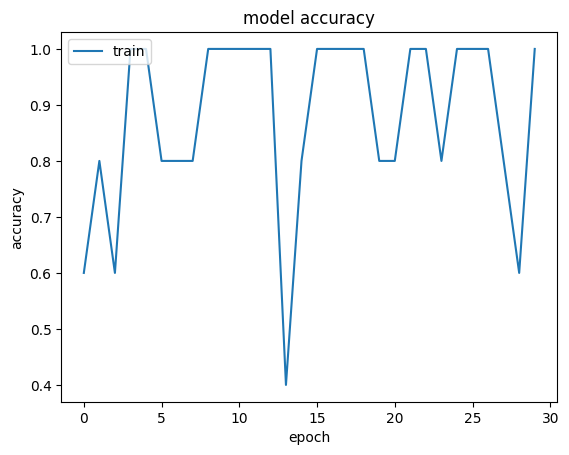

In [16]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [17]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 1.7042
Loss = 1.7042062282562256
Test Accuracy = 0.0


In [20]:
!ls

1_efficientnet_with_imagenet_pretrained_weights.ipynb  dataset
2-efficientnetB0_Custom_dataset.ipynb		       unseen_imagenet.jfif
3-EfficientNetB0_for_transfer_learning.ipynb


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


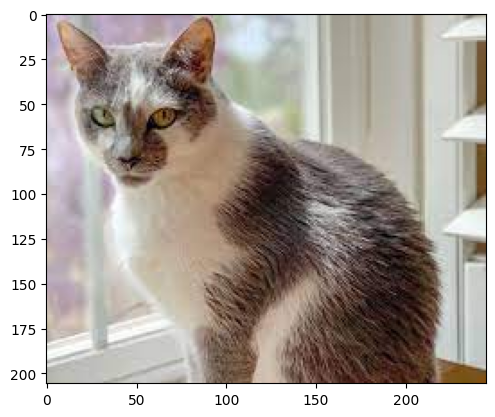

In [21]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen_imagenet.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [22]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.8384232e-01, 7.2729747e-15, 8.1615764e-01]], dtype=float32)

In [23]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [24]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.8000 - loss: 7.0958
Epoch 3/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/30
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/30
1/1 - 1s - 1s/step - accuracy: 0.8000 - loss: 0.5923
Epoch 7/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0915
Epoch 8/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/30
1/1 - 1s - 1s/step - accuracy: 0.8000 - loss: 0.2102
Epoch 11/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 13/30
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 1.2636e-06
Epoch 14/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 15/30
1/1 - 2s - 2s/step - accuracy: 0.8000 - loss: 3

In [25]:

%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

Epoch 1/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 2.3842e-08
Epoch 6/30
1/1 - 3s - 3s/step - accuracy: 0.8000 - loss: 3.5383
Epoch 7/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/30
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/30
1/1 - 1s - 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/30
1/1 - 3s - 3s/step - accuracy: 0.6000 - loss: 52.6847
Epoch 12/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 13/30
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 14/30
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 15/30
1/1 - 2s - 2s/step - accuracy: 1.0000 

In [26]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds